In [41]:
# Import the libraries we will be using
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [5]:
# Read Data from csv
df=pd.read_csv("credit-data-post-import.csv")

In [6]:
# Display data
df.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
# Splitting data 
split = np.random.rand(len(df)) < 0.75

In [9]:
train=df[split]

In [10]:
test=df[~split]

In [13]:
# Seperating non null data
df_nn=train[train['monthly_income'].notnull()]
print(df_nn.shape)
df_nn.head()

(89993, 11)


,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0


In [14]:
# Null data
df_n=train[train['monthly_income'].isnull()]
print(df_n.shape)
df_n.head()

(22316, 11)


,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
16,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
41,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0
58,0,0.541109,43,0,2477.0,NaN,3,0,1,0,2.0
62,0,0.101156,72,0,1720.0,NaN,12,0,2,0,0.0
71,0,0.142013,67,0,1824.0,NaN,7,0,2,0,0.0


In [15]:
X_train=df_nn[['number_real_estate_loans_or_lines','number_of_open_credit_lines_and_loans']]
Y_train=df_nn.monthly_income 

In [16]:
X_test=df_n[['number_real_estate_loans_or_lines','number_of_open_credit_lines_and_loans']]

In [17]:
m1 = RandomForestRegressor()
m1.fit(X_train, Y_train)

In [22]:
df_n['monthly_income']=m1.predict(X_test)

C:\Users\ranap\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
df_n.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
16,0,0.061086,78,0,2058.0,8141.450641,10,0,2,0,0.0
41,0,0.072898,81,0,75.0,5273.024149,7,0,0,0,0.0
58,0,0.541109,43,0,2477.0,5645.054063,3,0,1,0,2.0
62,0,0.101156,72,0,1720.0,8096.253545,12,0,2,0,0.0
71,0,0.142013,67,0,1824.0,7676.492427,7,0,2,0,0.0


In [25]:
train=pd.concat([df_nn,df_n])

In [26]:
train.to_csv("credit-data-trainingset.csv")

In [27]:
check_nn=test[test['monthly_income'].notnull()]
print(check_nn.shape)
check_nn.head()

(30276, 11)


,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
12,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
26,0,0.052436,58,0,0.097672,8333.0,22,0,1,0,0.0
28,0,0.452516,24,0,0.011761,3400.0,1,0,0,0,0.0
31,0,1.000000,24,0,0.472703,750.0,1,0,0,0,0.0


In [28]:
check_n=test[test['monthly_income'].isnull()]
print(check_n.shape)
check_n.head()

(7415, 11)


,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
6,0,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0
8,0,0.116951,27,0,46.0,NaN,2,0,0,0,0.0
32,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
52,0,1.000000,62,0,0.0,NaN,1,0,0,0,0.0
86,0,0.360510,58,1,3282.0,NaN,8,0,2,0,0.0


In [29]:
train_test=check_n[['number_real_estate_loans_or_lines','number_of_open_credit_lines_and_loans']]

In [30]:
model=m1.predict(train_test)

In [32]:
check_n['monthly_income']=model
check_n.head()

C:\Users\ranap\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
6,0,0.305682,57,0,5710.0,9585.657768,8,0,3,0,0.0
8,0,0.116951,27,0,46.0,3825.273233,2,0,0,0,0.0
32,0,0.083418,62,0,977.0,6470.194569,6,0,1,0,0.0
52,0,1.000000,62,0,0.0,3558.578979,1,0,0,0,0.0
86,0,0.360510,58,1,3282.0,7878.944224,8,0,2,0,0.0


In [33]:
test=pd.concat([check_nn,check_n])
test.to_csv("credit-data-testset.csv")

In [34]:
dfn=pd.read_csv("credit-data-trainingset.csv")
df.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [36]:
dlq=dfn.serious_dlqin2yrs 
dlqx=dfn.drop('serious_dlqin2yrs',axis=1)

In [45]:
m2 = LogisticRegression(penalty='l2',C=1, solver='liblinear')
m2.fit(dlqx,dlq)
cross_val_score(m2, dlqx, dlq, cv=5)

array([0.9326418 , 0.93246372, 0.93290891, 0.93246372, 0.93241619])

In [38]:
m3=SVC()
m3.fit(dlqx,dlq)
cross_val_score(m3,dlqx,dlq, cv=5)

array([0.93246372, 0.93250824, 0.93250824, 0.93250824, 0.93250523])

In [42]:
m4=AdaBoostClassifier()
m4.fit(dlqx,dlq)
cross_val_score(m4,dlqx,dlq, cv=5)

array([0.93486778, 0.93580269, 0.93406642, 0.9249399 , 0.93464227])

In [43]:
m5=DecisionTreeClassifier()
m5.fit(dlqx,dlq)
cross_val_score(m5, dlqx, dlq, cv=5)

array([0.75434066, 0.89266316, 0.89631377, 0.79561036, 0.8766306 ])

In [49]:
t=time.time() 
par={'n_estimators':[10,50,250],'learning_rate':[0.01,0.1,1]} 
clf = GridSearchCV(m1, par) 
clf.fit(dlqx,dlq) 
t1=time.time() 
print((t1-t)/60)

ValueError: Invalid parameter learning_rate for estimator RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
bacc=clf.best_score_
bparam=clf.best_params_

In [ ]:
# best accuracy and parameters
print(acc)
print(param)

In [ ]:
dftest=pd.read_csv("credit-data-testset.csv")

In [ ]:
ytest=dftest.serious_dlqin2yrs
xtest=dftest.drop('serious_dlqin2yrs',axis=1)

In [ ]:
best_classifier=AdaBoostClassifier(learning_rate= 0.1, n_estimators= 100)
best_classifier.fit(xtest,ytest)
pred=best_classifier.predict(xtest)
accuracy_score(ytest,pred)

In [ ]:
y_test_p1 = best_classifier.predict_proba(xtest)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(ytest, y_test_p1)
roc_auc = roc_auc_score(ytest, best_classifier.predict(xtest))
print("ROC_AUC for AdaBoost",roc_auc)

y_test_p2 = model.predict_proba(xtest)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(ytest, y_test_p2)
roc_auc_lr = roc_auc_score(ytest, m1.predict(xtest))
print("ROC_AUC for Logistic Regression",roc_auc_l)

y_test_p3 = model1.predict_proba(xtest)[:, 1]
fpr3, tpr3, thresholds3 = roc_curve(ytest, y_test_p3)
roc_auc_dt = roc_auc_score(ytest, m2.predict(xtest))
print("ROC_AUC for Decision Tree",roc_auc_DT)

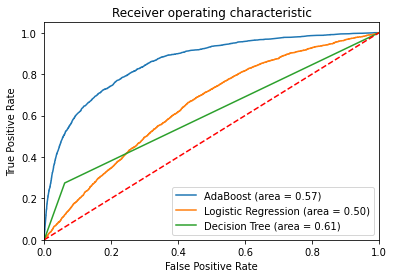

In [105]:
plt.plot(fpr1, tpr1, label='AdaBoost (area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, label='Logistic Regression (area = %0.2f)' % roc_auc_Log)
plt.plot(fpr3, tpr3, label='Decision Tree (area = %0.2f)' % roc_auc_DT)

plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

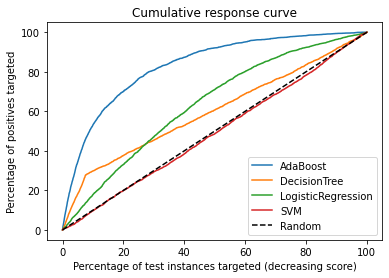

In [91]:
def build_cumulative_curve(model, scale=100):
    # Fit model
    model.fit(X, y)

    # Get the probability of Y_test records being = 1
    y_test_probability_1 = model.predict_proba(xtest)[:, 1]

    # Sort these probabilities and the true value in descending order of probability
    order = np.argsort(y_test_probability_1)[::-1]
    y_test_probability_1_sorted = y_test_probability_1[order]
    y_test_sorted = np.array(ytest)[order]

    # Build the cumulative response curve
    x_cumulative = np.arange(len(y_test_probability_1_sorted)) + 1
    y_cumulative = np.cumsum(y_test_sorted)

    # Rescale
    x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * scale
    y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * scale
    
    return x_cumulative, y_cumulative

def plot_cumulative_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [0,100], 'k--', label="Random")
    plt.xlabel("Percentage of test instances targeted (decreasing score)")
    plt.ylabel("Percentage of positives targeted")
    plt.title("Cumulative response curve")
    plt.legend()

models = {"AdaBoost": AdaBoostClassifier(n_estimators= 100,learning_rate= 0.1),"DecisionTree":DecisionTreeClassifier(),"LogisticRegression":LogisticRegression(),"SVM":SVC(probability=True)}
plot_cumulative_curve(models)

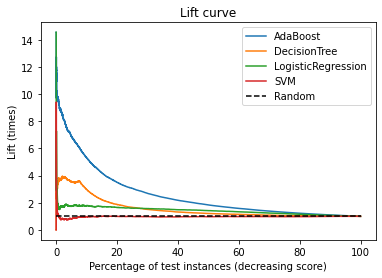

In [92]:
def plot_lift_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative/x_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [1,1], 'k--', label="Random")
    plt.xlabel("Percentage of test instances (decreasing score)")
    plt.ylabel("Lift (times)")
    plt.title("Lift curve")
    plt.legend()

plot_lift_curve(models)